# Module 3 - Classification Bakeoff
## Emilia Orellana and Bryan Santos

The goal of this week's assessment is to find the model which best predicts whether a person will default on their loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 

Dataset: The dataset comes customers default payments in Taiwan. More information about the dataset and columns are found in the link below.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#


We have fitted several different models (KNN, Logistic Regression, Decision Tree Classifier, Random Forest, Gradient Boost and XGBoost) and used gridsearch to find the best hyperparameters for those models. Then we  compared the performance of those models on a test set to find the best one.  


## Dataset

There are 25 initial variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
### Needed libraries for Classification Modeling ###

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import itertools
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
sns.set()

%matplotlib inline

### Suppress notebook warnings ###
import warnings
warnings.filterwarnings('ignore')

### Pandas settings to avoid exponential form and display all columns ###
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

/Users/Bryan/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 1. Data Cleaning

### Initial data investigation 

In [2]:
### Load data ###
df = pd.read_csv('student_data.csv')

In [3]:
### Check distribution of dependent variable ###
df['default payment next month'].value_counts()

0    18691
1     5308
Name: default payment next month, dtype: int64

Based on initial investigation, there are more clients that will not default payment next month. Approximately **22%** of **23,999** clients will not default.

In [4]:
### Check all columns ###
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
### Check data shape ###
df.shape

(23999, 25)

In [6]:
### Check columns with null values for potential cleaning ###
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no null values in the dataset.

In [7]:
### Check column data types ###
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [8]:
### Drop ID column because it is only a unique identified and not a predictor ###
df.drop(['ID'], inplace=True, axis =1)

### Education

This section checks if all corresponding values in Education column satisfy the criteria mentioned in the dataset variable description.

In [9]:
### Check unique Education column values ###
df['EDUCATION'].unique()

array([1, 2, 3, 5, 6, 4, 0])

In [10]:
### Check count per unique value ###
df['EDUCATION'].value_counts()

2    11188
1     8442
3     3994
5      223
4      100
6       41
0       11
Name: EDUCATION, dtype: int64

Given that value 4 is Others while 5 and 6 are Unknown, we changed all 5 and 6 into Others.

In [11]:
### Replace all Unknown to Others ###
df['EDUCATION'].replace(5, 4, inplace=True)
df['EDUCATION'].replace(6, 4, inplace=True)
df['EDUCATION'].replace(0, 4, inplace=True)

df['EDUCATION'].value_counts()

2    11188
1     8442
3     3994
4      375
Name: EDUCATION, dtype: int64

### Marriage

This section checks if all corresponding values in Marriage column satisfy the criteria mentioned in the dataset variable description.

In [12]:
### Check unique Marriage column values ###
df['MARRIAGE'].unique()

array([2, 1, 3, 0])

In [13]:
### Check count per unique value ###
df['MARRIAGE'].value_counts()

2    12735
1    10958
3      263
0       43
Name: MARRIAGE, dtype: int64

Based on the guidelines, there should only be three (3) variables for Marriage - 1, 2 and 3. Those with 0 as values can be safely bucketed into Others (3).

In [14]:
### Replace all Unknown to Others ###
df['MARRIAGE'].replace(0, 3, inplace=True)

df['MARRIAGE'].value_counts()

2    12735
1    10958
3      306
Name: MARRIAGE, dtype: int64

### Sex

In [15]:
df['SEX'].unique()

array([1, 2])

No cleaning required for this column as the values are either 1 or 2 satisfying the criteria.

### Pay_N

This section checks if all corresponding values in the multiple Pay_N columns satisfy the dataset variable descriptions.

In [16]:
### Check unique Pay_N column values ###
p0 = df['PAY_0'].unique()
p2 = df['PAY_2'].unique()
p3 = df['PAY_3'].unique()
p4 = df['PAY_4'].unique()
p5 = df['PAY_5'].unique()
p6 = df['PAY_6'].unique()

print (p0, p2, p3, p4, p5, p6)

[-2  2 -1  0  1  3  8  5  4  6  7] [-2  2 -1  0  3  1  4  7  8  6  5] [-2  2 -1  0  3  6  5  4  7  1  8] [-2  0 -1  2  3  5  4  7  6  1  8] [-2  0 -1  2  3  4  7  5  6  8] [-2  0 -1  2  3  4  7  6  5  8]


Based on the result above, the following values are not in the variable guidelines: -2 and 0. -1 means the the bill is duly paid so -2 and 0 do not make sense. -2 and 0 likely mean that the corresponding bills are also paid thus, they can be replaced with -1 value defined as "pay duly".

In [17]:
### Replace all -2 and 0 into -1 ###
df['PAY_0'].replace(-2, -1, inplace=True)
df['PAY_0'].replace(0, -1, inplace=True)
df['PAY_2'].replace(-2, -1, inplace=True)
df['PAY_2'].replace(0, -1, inplace=True)
df['PAY_3'].replace(-2, -1, inplace=True)
df['PAY_3'].replace(0, -1, inplace=True)
df['PAY_4'].replace(-2, -1, inplace=True)
df['PAY_4'].replace(0, -1, inplace=True)
df['PAY_5'].replace(-2, -1, inplace=True)
df['PAY_5'].replace(0, -1, inplace=True)
df['PAY_6'].replace(-2, -1, inplace=True)
df['PAY_6'].replace(0, -1, inplace=True)

p0 = df['PAY_0'].unique()
p2 = df['PAY_2'].unique()
p3 = df['PAY_3'].unique()
p4 = df['PAY_4'].unique()
p5 = df['PAY_5'].unique()
p6 = df['PAY_6'].unique()

print (p0, p2, p3, p4, p5, p6)

[-1  2  1  3  8  5  4  6  7] [-1  2  3  1  4  7  8  6  5] [-1  2  3  6  5  4  7  1  8] [-1  2  3  5  4  7  6  1  8] [-1  2  3  4  7  5  6  8] [-1  2  3  4  7  6  5  8]


## 2. EDA

### Correlation

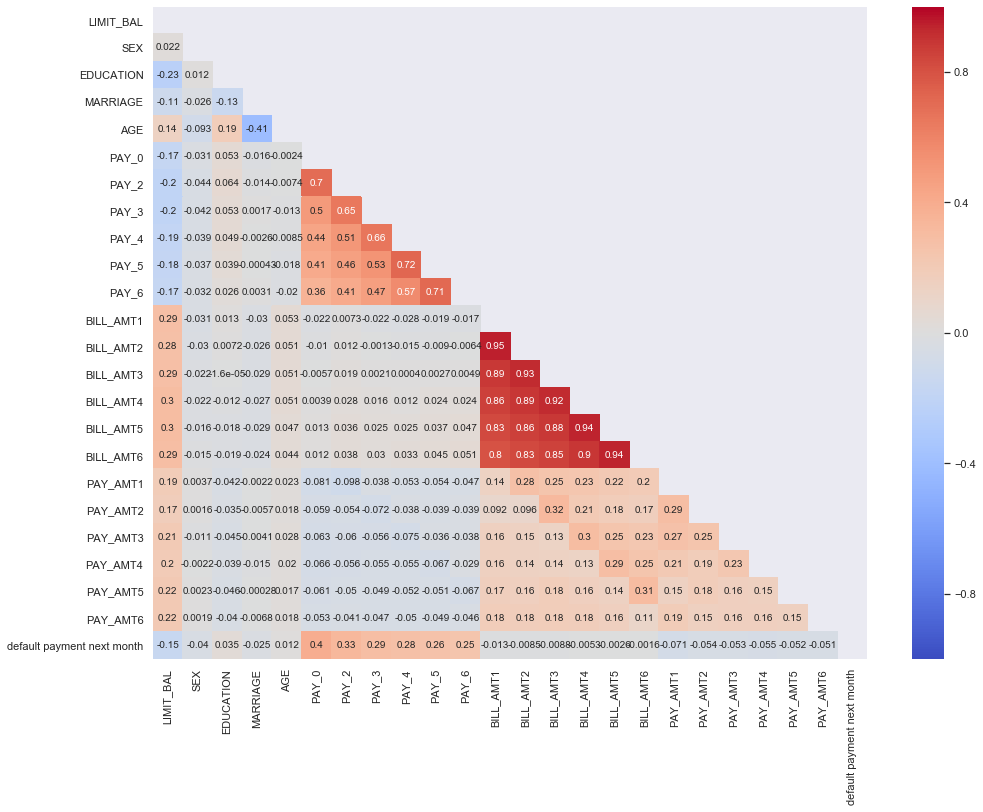

In [18]:
### Plot correlation between features ###

f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

### Dependent Variable - Will default next month or not?

In [19]:
### Check distribution on target values ###

default_df = pd.DataFrame(df['default payment next month'].value_counts())
default_df.reset_index(inplace = True)
default_df.columns = ['Status', 'Count']
default_df

,Status,Count
0,0,18691
1,1,5308


In [20]:
default_df['Status'].replace(0, "Will not default", inplace=True)
default_df['Status'].replace(1, "Will default", inplace=True)

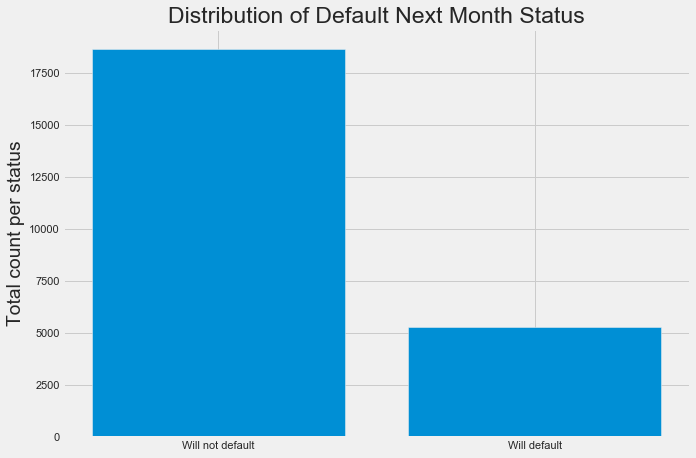

In [21]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(10,7))

ax.bar(default_df["Status"],default_df["Count"])

ax.set_ylabel("Total count per status")
ax.set_title('Distribution of Default Next Month Status')

plt.show()

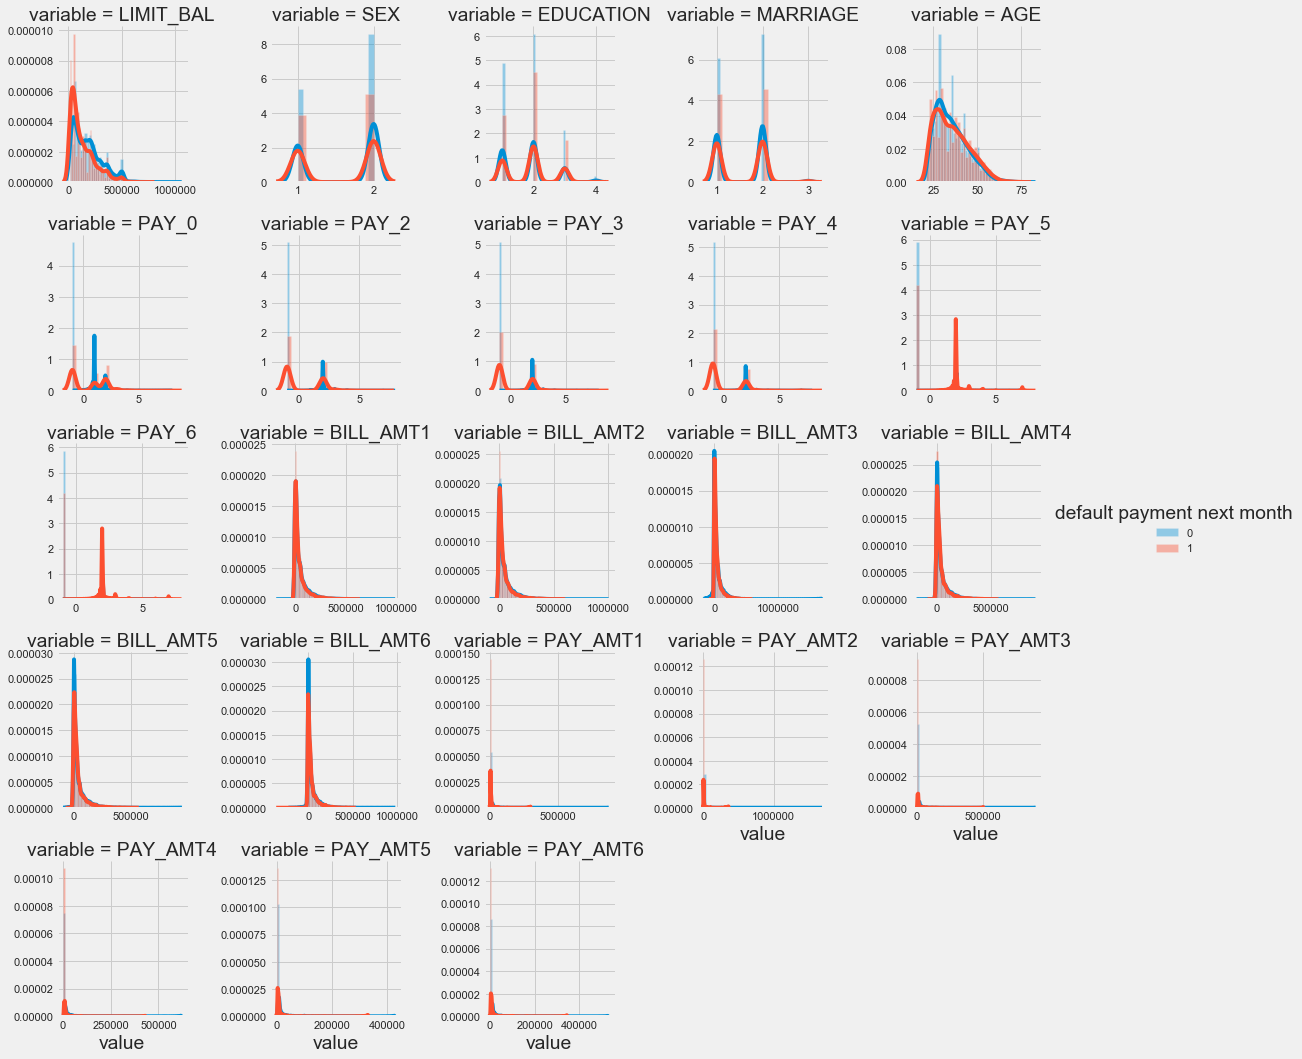

In [22]:
### SNS Displot ###

output = 'default payment next month'

cols = [ f for f in df.columns if df.dtypes[ f ] != "object"]
cols.remove( output )

f = pd.melt( df, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

## Features versus Target

### Limit Balance

In [23]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000,23999.000
mean,167825.729,1.604,1.846,1.556,35.523,-0.417,-0.535,-0.555,-0.624,-0.678,-0.670,51589.035,49521.698,47474.826,43796.590,40748.049,39226.852,5687.720,6019.571,5253.323,4824.491,4825.034,5245.643,0.221
std,129915.116,0.489,0.746,0.522,9.254,1.142,1.142,1.124,1.069,1.004,1.009,74104.133,71551.215,70010.815,64927.450,61257.538,60075.537,16698.507,24541.363,17967.029,15730.754,15596.580,17795.775,0.415
min,10000.000,1.000,1.000,1.000,21.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-165580.000,-67526.000,-157264.000,-170000.000,-81334.000,-339603.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,3577.500,2958.000,2718.000,2392.500,1801.000,1280.000,1000.000,858.500,395.000,300.000,269.500,125.000,0.000
50%,140000.000,2.000,2.000,2.000,34.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,22472.000,21290.000,20223.000,19145.000,18227.000,17175.000,2110.000,2012.000,1809.000,1500.000,1500.000,1500.000,0.000
75%,240000.000,2.000,2.000,2.000,42.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,67767.000,64635.500,60962.000,55418.000,50581.000,49434.500,5020.000,5000.000,4561.000,4089.000,4029.500,4008.000,0.000
max,1000000.000,2.000,4.000,3.000,79.000,8.000,8.000,8.000,8.000,8.000,8.000,964511.000,983931.000,1664089.000,891586.000,927171.000,961664.000,873552.000,1684259.000,896040.000,621000.000,426529.000,528666.000,1.000


In [24]:
bins = [0, 200000, 400000, 600000, 800000, 1000000]
labels = [200000, 400000, 600000, 800000, 1000000]
df['binned'] = pd.cut(df['LIMIT_BAL'], bins=bins, labels=labels)

In [25]:
limit_df = df.groupby(['binned', 'default payment next month']).size().unstack(1)
limit_df.reset_index(inplace = True)
limit_df.columns = ['Limit Balance', 'Will not default', 'Will default']
limit_df

,Limit Balance,Will not default,Will default
0,200000,12117.000,4165.000
1,400000,5299.000,968.000
2,600000,1213.000,170.000
3,800000,61.000,5.000
4,1000000,1.000,nan


In [26]:
limit_df["percent"] = limit_df["Will default"] / (limit_df["Will not default"] + limit_df["Will default"])
limit_df

,Limit Balance,Will not default,Will default,percent
0,200000,12117.000,4165.000,0.256
1,400000,5299.000,968.000,0.154
2,600000,1213.000,170.000,0.123
3,800000,61.000,5.000,0.076
4,1000000,1.000,nan,nan


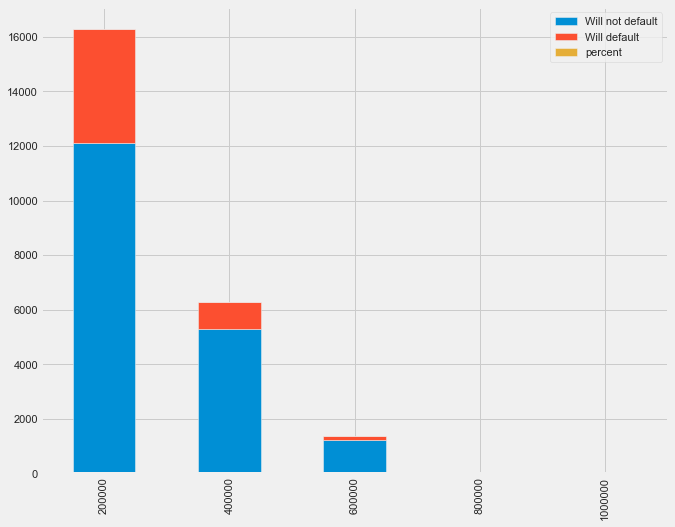

In [27]:
limit_df.index = [200000, 400000, 600000, 800000, 1000000]
limit_df.plot(kind='bar',stacked=True, figsize=(10,8))

As seen in the table summary and visualized in the graph above, the percentage of those that will default are decreasing as the credit limit is increasing.

### Sex

In [28]:
sex_df = df.groupby(['SEX', 'default payment next month']).size().unstack(1)
sex_df.reset_index(inplace = True)
sex_df.columns = ['Gender', 'Will not default', 'Will default']
sex_df["percent"] = sex_df["Will default"] / (sex_df["Will not default"] + sex_df["Will default"])

sex_df

,Gender,Will not default,Will default,percent
0,1,7215,2298,0.242
1,2,11476,3010,0.208


In [29]:
del sex_df['Gender']
del sex_df['percent']

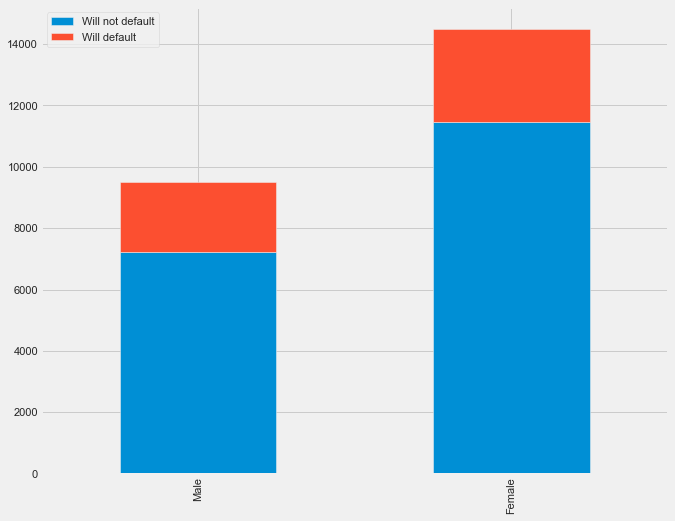

In [30]:
sex_df.index = ['Male', 'Female']
sex_df.plot(kind='bar',stacked=True, figsize=(10,8))

It is 4% more like for a Male to default than a female.

### Education

In [31]:
educ_df = df.groupby(['EDUCATION', 'default payment next month']).size().unstack(1)
educ_df.reset_index(inplace = True)
educ_df.columns = ['EDUCATION', 'Will not default', 'Will default']
educ_df["percent"] = educ_df["Will default"] / (educ_df["Will not default"] + educ_df["Will default"])

educ_df

,EDUCATION,Will not default,Will default,percent
0,1,6826,1616,0.191
1,2,8532,2656,0.237
2,3,2982,1012,0.253
3,4,351,24,0.064


In [32]:
del educ_df['EDUCATION']
del educ_df['percent']

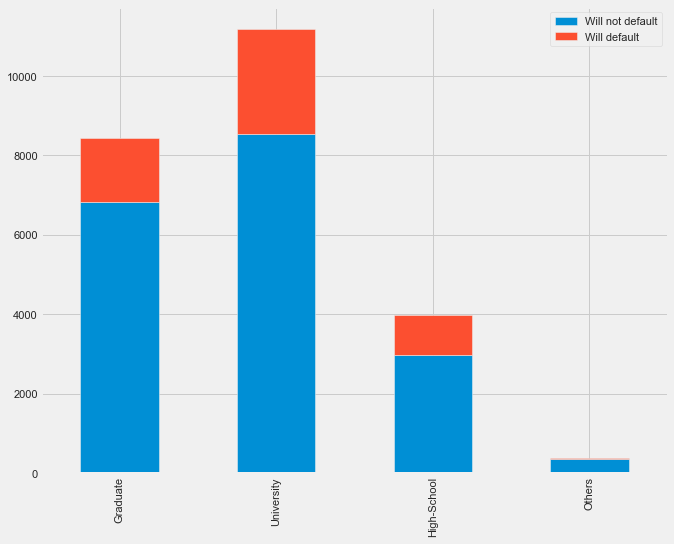

In [33]:
educ_df.index = ['Graduate', 'University', 'High-School', 'Others']
educ_df.plot(kind='bar',stacked=True, figsize=(10,8))

The higher the education, the less likely each person will default as observed in the percentages above.

### Marriage

In [34]:
marriage_df = df.groupby(['MARRIAGE', 'default payment next month']).size().unstack(1)
marriage_df.reset_index(inplace = True)
marriage_df.columns = ['MARRIAGE', 'Will not default', 'Will default']
marriage_df["percent"] = marriage_df["Will default"] / (marriage_df["Will not default"] + marriage_df["Will default"])

marriage_df

,MARRIAGE,Will not default,Will default,percent
0,1,8399,2559,0.234
1,2,10058,2677,0.210
2,3,234,72,0.235


In [35]:
del marriage_df['MARRIAGE']
del marriage_df['percent']

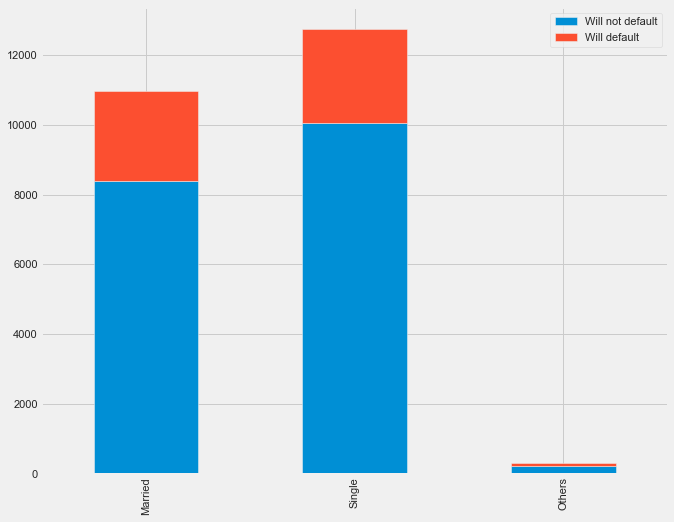

In [36]:
marriage_df.index = ['Married', 'Single', 'Others']
marriage_df.plot(kind='bar',stacked=True, figsize=(10,8))

It is 2.4 % more likely for a married person to default than a person who's married.

### Age

In [37]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = [30, 40, 50, 60, 70, 80]
df['age_binned'] = pd.cut(df['AGE'], bins=bins, labels=labels)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,binned,age_binned
0,350000,1,1,2,37,-1,-1,-1,-1,-1,-1,316,316,316,466,466,316,316,316,466,466,316,316,0,400000,40
1,50000,2,2,1,37,2,2,2,-1,-1,-1,40994,43594,38222,13026,13268,13497,5500,0,580,600,600,600,0,200000,40
2,50000,2,1,2,23,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980,0,200000,30
3,20000,1,3,1,56,-1,-1,-1,-1,2,-1,10847,12176,12884,13784,13420,13686,1508,1216,1116,0,490,658,0,200000,60
4,110000,2,2,2,32,-1,-1,-1,-1,-1,-1,108159,106812,108464,108829,110557,106082,5400,5400,4100,4100,4100,4200,0,200000,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,50000,2,1,2,24,-1,-1,-1,-1,-1,-1,12806,13490,0,0,0,0,7522,0,0,0,0,0,1,200000,30
23995,250000,1,3,1,44,-1,-1,-1,-1,-1,-1,6826,3900,4482,43546,38051,576,3924,4482,43676,38166,576,2389,1,400000,50
23996,50000,1,3,2,26,2,-1,-1,2,2,2,41827,42650,45930,44891,47654,48721,1800,4000,0,3500,2000,0,1,200000,30
23997,110000,2,2,1,38,-1,-1,-1,-1,-1,-1,195437,176420,63142,39854,9293,-1288,5000,10000,5048,2000,39958,52000,1,200000,40


In [38]:
age_df = df.groupby(['age_binned', 'default payment next month']).size().unstack(1)
age_df

default payment next month,0,1
age_binned,,
30,6827,1985
40,6791,1727
50,3681,1128
60,1222,415
70,162,48
80,8,5


In [39]:
age_df = df.groupby(['age_binned', 'default payment next month']).size().unstack(1)
age_df.reset_index(inplace = True)
age_df.columns = ['age_binned', 'Will not default', 'Will default']
age_df["percent"] = age_df["Will default"] / (age_df["Will not default"] + age_df["Will default"])

age_df

,age_binned,Will not default,Will default,percent
0,30,6827,1985,0.225
1,40,6791,1727,0.203
2,50,3681,1128,0.235
3,60,1222,415,0.254
4,70,162,48,0.229
5,80,8,5,0.385


In [40]:
del age_df['age_binned']
del age_df['percent']

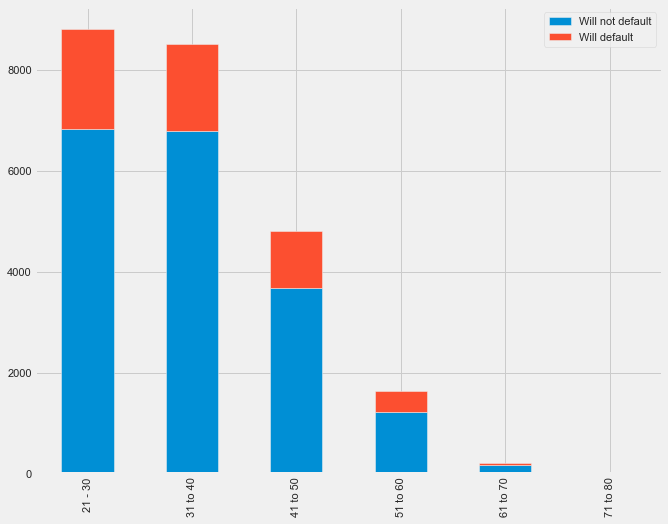

In [41]:
age_df.index = ['21 - 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70', '71 to 80']
age_df.plot(kind='bar',stacked=True, figsize=(10,8))

30 to 40 year old clients are more likely to not default versus other age groups


### Summary of Observations

- Those with lower LIMIT_BAL values are more likely to default
- Males (sex = 1) are more likely to default versus females (sex = 2)
- Those with lower education (not University or Graduate)are more likely to default versus those with higher education
- Non-singles (Married) are more likely to default versus singles
- 30 to 40 year old clients are more likely to not default versus other age groups
- Those who pay duly are much more likely to not default versus those who have balances left

## 3. Feature Engineering

### Adding balance to be paid 

Upon analysis of the available features, we realized that there is no feature that tracks the current balance of each client. 

In [42]:
df['BALANCE'] = (df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']) - (df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']) 

In [43]:
df['BALANCE'].describe()

count      23999.000
mean      240501.269
std       365991.343
min     -2671514.000
25%         4639.500
50%       103026.000
75%       309589.000
max      4116080.000
Name: BALANCE, dtype: float64

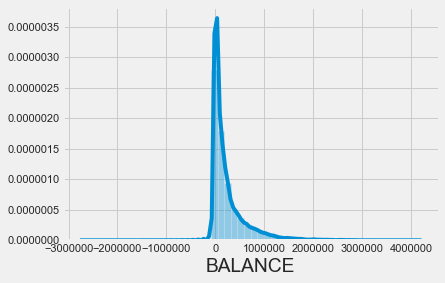

In [44]:
sns.distplot(df['BALANCE'])

### More detailed civil status

In [45]:
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'CIVIL_STATUS'] = 1 # Married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'CIVIL_STATUS'] = 2 # Single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'CIVIL_STATUS'] = 3 # Divorced/widowed man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'CIVIL_STATUS'] = 4 # Married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'CIVIL_STATUS'] = 5 # Single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'CIVIL_STATUS'] = 6 # Divorced woman

In [46]:
df['CIVIL_STATUS'].describe()

count   23999.000
mean        3.367
std         1.545
min         1.000
25%         2.000
50%         4.000
75%         5.000
max         6.000
Name: CIVIL_STATUS, dtype: float64

In [47]:
civil_df = df.groupby(['CIVIL_STATUS', 'default payment next month']).size().unstack(1)
civil_df.reset_index(inplace = True)
civil_df.columns = ['CIVIL_STATUS', 'Will not default', 'Will default']
civil_df["percent"] = civil_df["Will default"] / (civil_df["Will not default"] + civil_df["Will default"])

civil_df

,CIVIL_STATUS,Will not default,Will default,percent
0,1.000,3113,1074,0.257
1,2.000,4010,1190,0.229
2,3.000,92,34,0.270
3,4.000,5286,1485,0.219
4,5.000,6048,1487,0.197
5,6.000,142,38,0.211


In [48]:
del civil_df['CIVIL_STATUS']
del civil_df['percent']

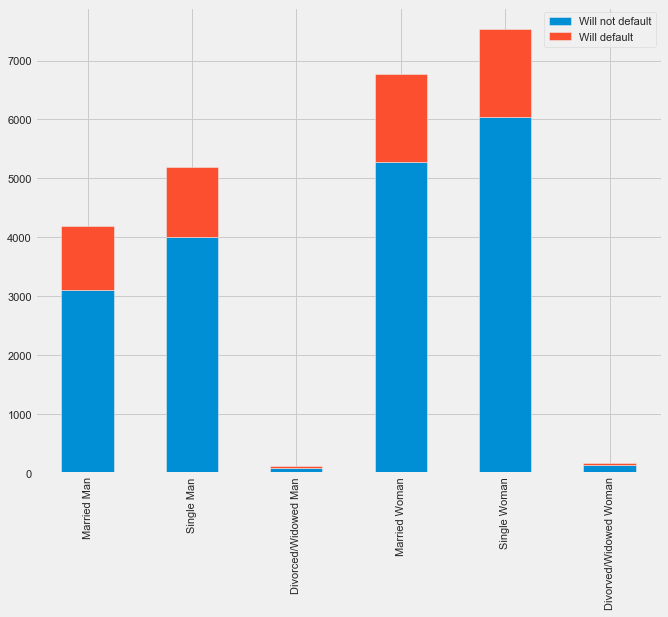

In [49]:
civil_df.index = ['Married Man', 'Single Man', 'Divorced/Widowed Man', 'Married Woman', 'Single Woman', 'Divorved/Widowed Woman']
civil_df.plot(kind='bar',stacked=True, figsize=(10,8))

This is better because we can distinguish than men in general are more likely to default than women in each category of civil status. Divorced/widowed men and married men are the two categories that have the highest percentage of default. While single women has the lowest.

## 4. Feature Selection

In [50]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'binned', 'age_binned', 'BALANCE',
       'CIVIL_STATUS'],
      dtype='object')

In [206]:
target = df['default payment next month']

In [207]:
features = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BALANCE',
       'CIVIL_STATUS']]

In [208]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree, Random Forest, Gradient Boost, XGBoost

Functions for reuse:

In [209]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression

In [210]:
logreg = LogisticRegression().fit(X_train,y_train)

**Check null accuracy** 

In [211]:
# examine the class distribution of the testing set (using a Pandas Series method)

y_test.value_counts()

0    3724
1    1076
Name: default payment next month, dtype: int64

In [212]:
y_pred = logreg.predict(X_test)
y_pred_series = pd.Series(y_pred)
y_pred_series.value_counts()

0    4800
dtype: int64

In [213]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.7758333333333334

**Test Scores**

In [214]:
y_pred = logreg.predict(X_test)

In [215]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred))

[[3724    0]
 [1076    0]]


In [216]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Will Not Default', 'Will Default']

Confusion Matrix, without normalization
[[3724    0]
 [1076    0]]


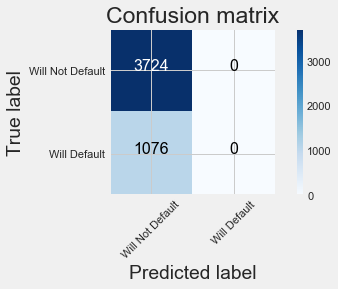

In [217]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [218]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
cv = cross_val_score(logreg, features, target, cv=10, scoring='roc_auc').mean()

pd.DataFrame(data=[accuracy, precision, recall, f1, roc_auc, cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.776
precision,0.000
recall,0.000
F1,0.000
ROC AUC,0.651
CV,0.665


#### Adjusting classification threshold

In [219]:
THRESHOLD = 0.25
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.precision_score(y_test, preds),
                   metrics.recall_score(y_test, preds), metrics.f1_score(y_test, preds), metrics.roc_auc_score(y_test, preds), cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.573
precision,0.298
recall,0.666
F1,0.411
ROC AUC,0.606
CV,0.665


In [220]:
THRESHOLD = 0.5
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.precision_score(y_test, preds),
                   metrics.recall_score(y_test, preds), metrics.f1_score(y_test, preds), metrics.roc_auc_score(y_test, preds), cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.776
precision,0.000
recall,0.000
F1,0.000
ROC AUC,0.500
CV,0.665


In [221]:
THRESHOLD = 0.75
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.precision_score(y_test, preds),
                   metrics.recall_score(y_test, preds), metrics.f1_score(y_test, preds), metrics.roc_auc_score(y_test, preds), cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.776
precision,0.000
recall,0.000
F1,0.000
ROC AUC,0.500
CV,0.665


### KNN

In [222]:
knn = KNeighborsClassifier(n_neighbors=1)

In [223]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [224]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_trainK = scaler.transform(X_train)  
X_testK = scaler.transform(X_test)  


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_trainK, y_train)

y_pred = model.predict(X_test)

In [225]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred))

[[3724    0]
 [1076    0]]


In [226]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Will Not Default', 'Will Default']

Confusion Matrix, without normalization
[[3724    0]
 [1076    0]]


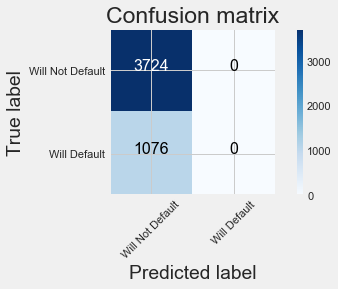

In [227]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [228]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
cv = cross_val_score(model, features, target, cv=10, scoring='roc_auc').mean()

pd.DataFrame(data=[accuracy, precision, recall, f1, roc_auc, cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.776
precision,0.000
recall,0.000
F1,0.000
ROC AUC,0.500
CV,0.547


In [229]:
# search for an optimal value of K for KNN
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.6834188899573255, 0.7073656134311913, 0.7098593370353299, 0.7084226991123302, 0.7139314081707643, 0.7071389001122333, 0.7164333582120932, 0.7068368021094467, 0.714161454426661, 0.7102772263314978]


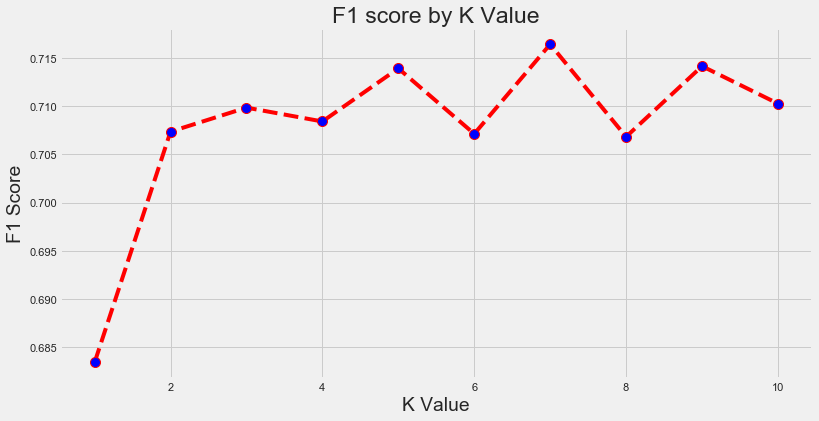

In [230]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 11), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

In [231]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_trainK = scaler.transform(X_train)  
X_testK = scaler.transform(X_test)  


model2 = KNeighborsClassifier(n_neighbors=9)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

In [232]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred))

[[3505  219]
 [ 924  152]]


In [233]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Will Not Default', 'Will Default']

Confusion Matrix, without normalization
[[3505  219]
 [ 924  152]]


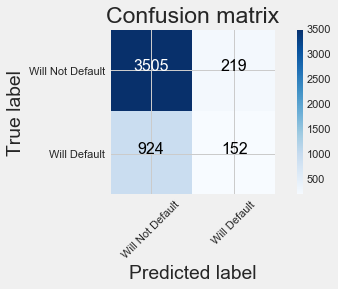

In [234]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [235]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_prob = model2.predict_proba(X_test)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
cv = cross_val_score(model2, features, target, cv=10, scoring='roc_auc').mean()

pd.DataFrame(data=[accuracy, precision, recall, f1, roc_auc, cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.762
precision,0.410
recall,0.141
F1,0.210
ROC AUC,0.618
CV,0.629


### Decision Tree (Classification)

In [287]:
ctree=DecisionTreeClassifier(max_depth = 5)
ctree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

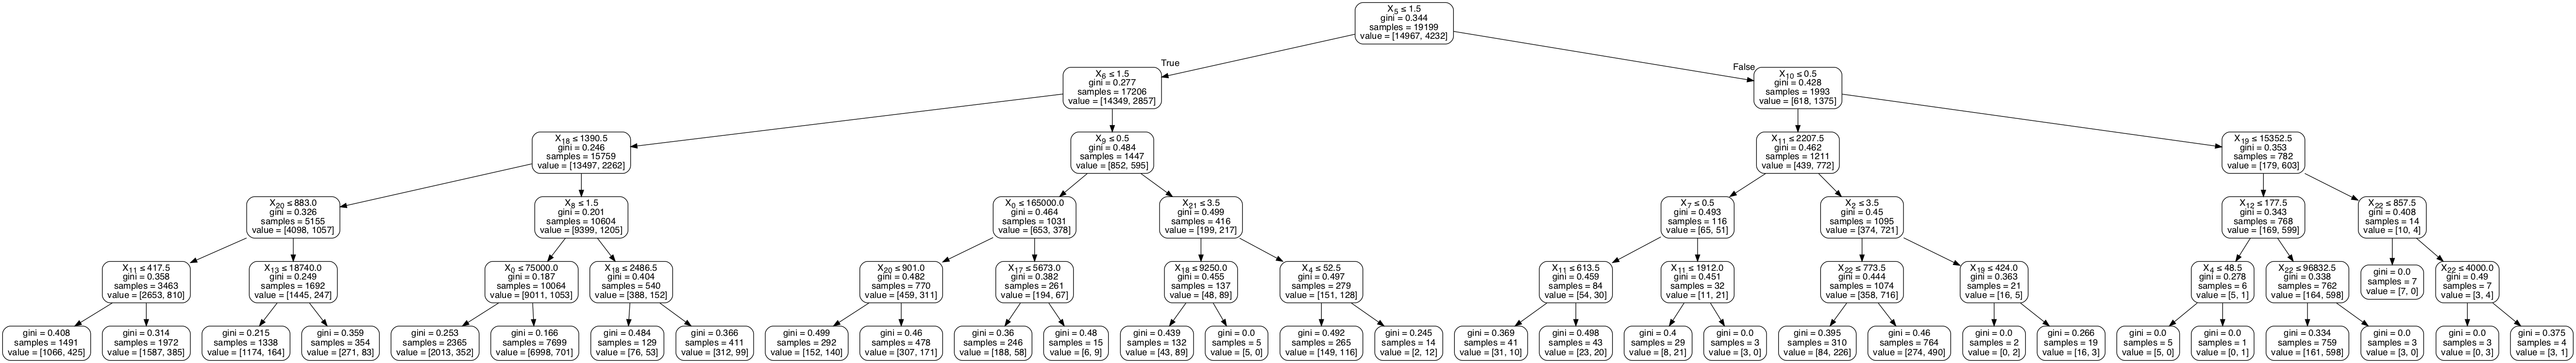

In [237]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [238]:
clasPred = ctree.predict(X_test)

In [239]:
print(metrics.confusion_matrix(y_test, clasPred))

[[3572  152]
 [ 697  379]]


In [240]:
cm = confusion_matrix(y_test,clasPred)
classes = ['Will Not Default', 'Will Default']

Confusion Matrix, without normalization
[[3572  152]
 [ 697  379]]


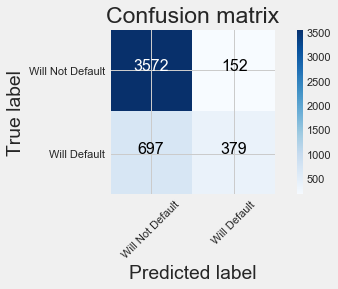

In [241]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [242]:
accuracy = metrics.accuracy_score(y_test, clasPred)
precision = metrics.precision_score(y_test, clasPred)
recall = metrics.recall_score(y_test, clasPred)
f1 = metrics.f1_score(y_test, clasPred)
y_pred_prob = ctree.predict_proba(X_test)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
cv = cross_val_score(ctree, features, target, cv=10, scoring='roc_auc').mean()

pd.DataFrame(data=[accuracy, precision, recall, f1, roc_auc, cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.823
precision,0.714
recall,0.352
F1,0.472
ROC AUC,0.748
CV,0.751


The ‘value’ row in each node tells us how many of the observations that were sorted into that node fall into each of our three categories. 

[0.8196594700218988, 0.819701188764674, 0.8205347999337038, 0.820951466643773, 0.8207847826087585, 0.8192844699206256, 0.8175345393506145, 0.8131590530079373, 0.8139095565019485]


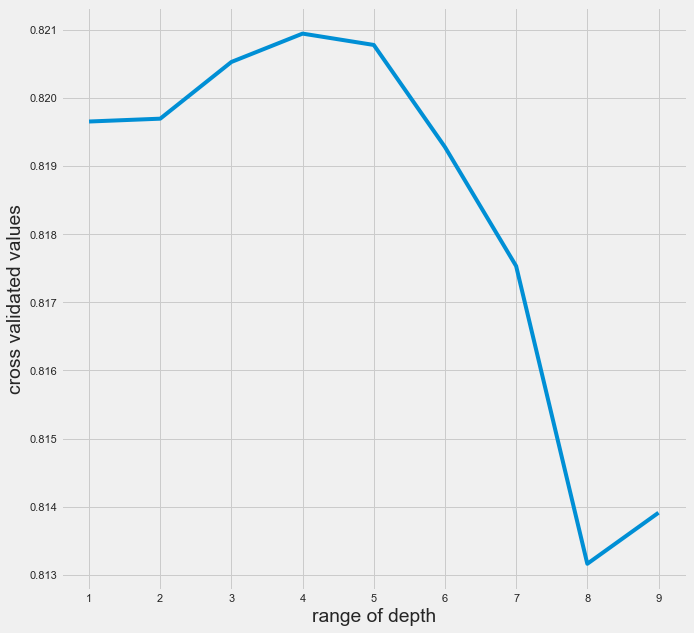

In [243]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ctree, features, target, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, features, target, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

In [244]:
ctree2=DecisionTreeClassifier(max_depth = 4)
ctree2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

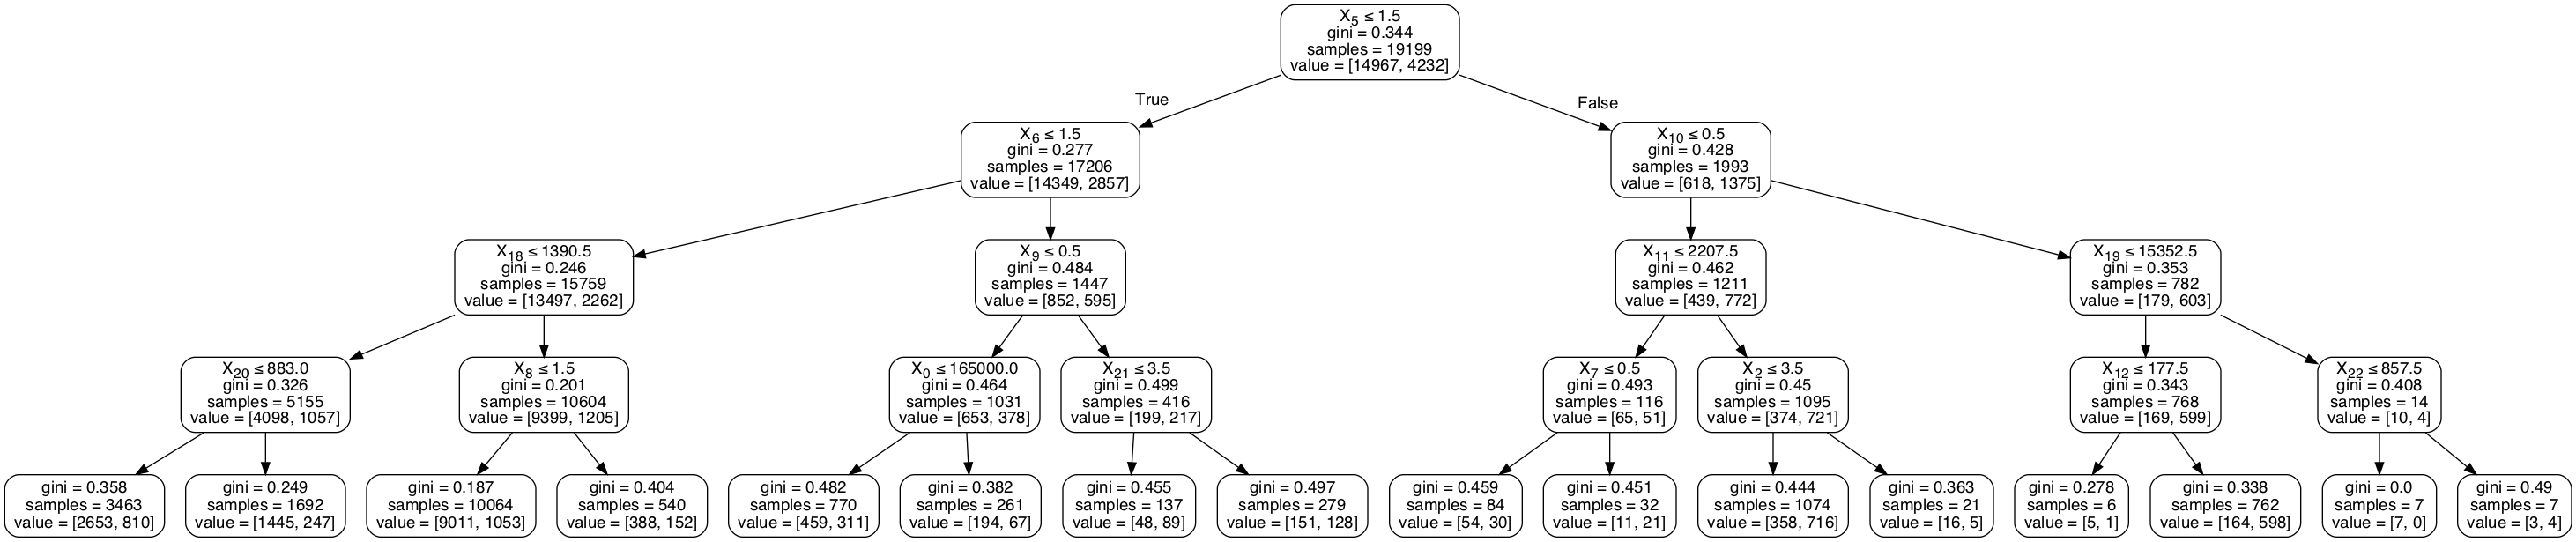

In [245]:
dot_data = StringIO()
export_graphviz(ctree2, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [246]:
clasPred = ctree2.predict(X_test)

In [247]:
print(metrics.confusion_matrix(y_test, clasPred))

[[3580  144]
 [ 697  379]]


In [248]:
cm = confusion_matrix(y_test,clasPred)
classes = ['Will Not Default', 'Will Default']

Confusion Matrix, without normalization
[[3580  144]
 [ 697  379]]


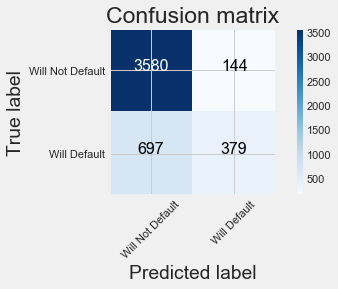

In [249]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [250]:
accuracy = metrics.accuracy_score(y_test, clasPred)
precision = metrics.precision_score(y_test, clasPred)
recall = metrics.recall_score(y_test, clasPred)
f1 = metrics.f1_score(y_test, clasPred)
y_pred_prob = ctree2.predict_proba(X_test)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
cv = cross_val_score(ctree2, features, target, cv=10, scoring='roc_auc').mean()

pd.DataFrame(data=[accuracy, precision, recall, f1, roc_auc, cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.825
precision,0.725
recall,0.352
F1,0.474
ROC AUC,0.745
CV,0.742


#### Validation Curve

In [251]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(target.shape)
print(features.shape)

(19199, 25)
(4800, 25)
(19199,)
(4800,)
(23999,)
(23999, 25)


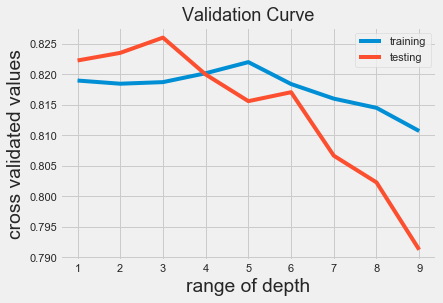

In [252]:
depth_range = range(1,10)
val = []
val2 = []

for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    training_score = cross_val_score(ctree, X_train, y_train, cv = 10)
    test_score = cross_val_score(ctree, X_test, y_test, cv = 10)
    val.append(training_score.mean())
    val2.append(test_score.mean())
    
fig, ax = plt.subplots()

ax.plot(depth_range, val, label="training")
ax.plot(depth_range, val2, label="testing")

plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.title("Validation Curve", fontsize=18);

ax.legend()
plt.show()

### Random Forest

Baseline

In [253]:
# check to see if random forest can beat this performance 
rf = RandomForestClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [347]:
# fit the random forest parameter 
rf.fit(X_train, y_train)
base_prediction = rf.predict(X_test)

In [331]:
print(metrics.confusion_matrix(y_test, base_prediction))

[[3508  216]
 [ 720  356]]


In [332]:
cm = confusion_matrix(y_test, base_prediction)
classes = ['Will Not Default', 'Will Default']

Confusion Matrix, without normalization
[[3508  216]
 [ 720  356]]


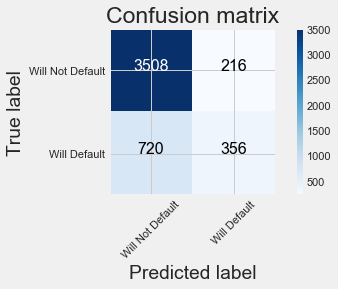

In [333]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [334]:
accuracy = metrics.accuracy_score(y_test, base_prediction)
precision = metrics.precision_score(y_test, base_prediction)
recall = metrics.recall_score(y_test, base_prediction)
f1 = metrics.f1_score(y_test, base_prediction)
y_pred_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
cv = cross_val_score(rf, features, target, cv=10, scoring='roc_auc').mean()

pd.DataFrame(data=[accuracy, precision, recall, f1, roc_auc, cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.805
precision,0.622
recall,0.331
F1,0.432
ROC AUC,0.727
CV,0.730


In [104]:
# Number of trees in random forest
n_estimators = [10,50, 100, 200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
max_depth =[2,5,10]
min_samples_leaf=[1]
min_samples_split=[2]
bootstrap = [True, False]
# Create the random grid
param_grid = {  'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf,
                'min_samples_split': min_samples_split,
                'bootstrap': bootstrap}
pprint(param_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [10, 50, 100, 200]}


In [335]:
# Create a based model
rf = RandomForestClassifier(random_state = 42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [336]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [337]:
rf_grid = RandomForestClassifier(random_state = 42, bootstrap = True, max_depth = 10, max_features = 'auto', n_estimators = 100, min_samples_leaf = 1, min_samples_split = 2)
rf_grid.fit(X_train, y_train)
grid_prediction = rf_grid.predict(X_test)

In [338]:
print(metrics.confusion_matrix(y_test, grid_prediction))

[[3546  178]
 [ 688  388]]


In [341]:
cm = confusion_matrix(y_test, grid_prediction)
classes = ['Will Not Default', 'Will Default']

Confusion Matrix, without normalization
[[3546  178]
 [ 688  388]]


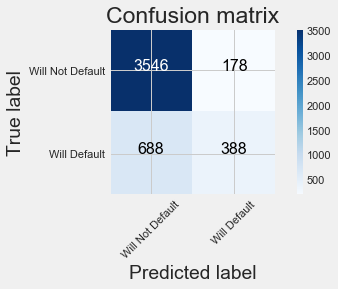

In [342]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [345]:
accuracy = metrics.accuracy_score(y_test, grid_prediction)
precision = metrics.precision_score(y_test, grid_prediction)
recall = metrics.recall_score(y_test, grid_prediction)
f1 = metrics.f1_score(y_test, grid_prediction)
y_pred_prob = rf_grid.predict_proba(X_test)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
cv = cross_val_score(rf_grid, features, target, cv=10, scoring='roc_auc').mean()

pd.DataFrame(data=[accuracy, precision, recall, f1, roc_auc, cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.820
precision,0.686
recall,0.361
F1,0.473
ROC AUC,0.775
CV,0.777


### XGBoost

In [264]:
xgb = XGBClassifier(n_jobs = -1)
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [265]:
xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)

In [266]:
print(metrics.confusion_matrix(y_test, prediction))

[[3556  168]
 [ 677  399]]


In [267]:
cm = confusion_matrix(y_test,prediction)
classes = ['Will Not Default', 'Will Default']

Confusion Matrix, without normalization
[[3556  168]
 [ 677  399]]


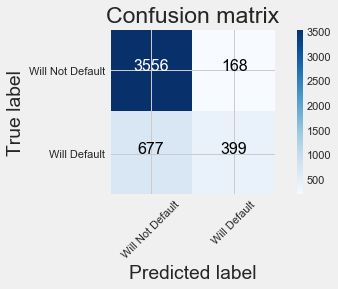

In [268]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [269]:
accuracy = metrics.accuracy_score(y_test, prediction)
precision = metrics.precision_score(y_test, prediction)
recall = metrics.recall_score(y_test, prediction)
f1 = metrics.f1_score(y_test, prediction)
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
cv = cross_val_score(xgb, features, target, cv=10, scoring='roc_auc').mean()

pd.DataFrame(data=[accuracy, precision, recall, f1, roc_auc, cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.824
precision,0.704
recall,0.371
F1,0.486
ROC AUC,0.774
CV,0.778


In [270]:
best_XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [271]:
best_XGB.fit(X_train, y_train)
prediction = best_XGB.predict(X_test)

In [272]:
print(metrics.confusion_matrix(y_test, prediction))

[[3540  184]
 [ 673  403]]


In [273]:
cm = confusion_matrix(y_test,prediction)
classes = ['Will Not Default', 'Will Default']

Confusion Matrix, without normalization
[[3540  184]
 [ 673  403]]


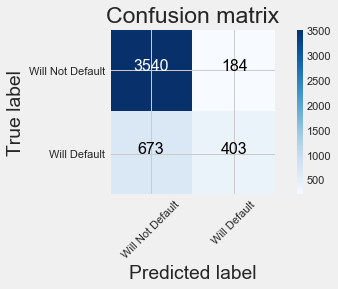

In [274]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [275]:
accuracy = metrics.accuracy_score(y_test, prediction)
precision = metrics.precision_score(y_test, prediction)
recall = metrics.recall_score(y_test, prediction)
f1 = metrics.f1_score(y_test, prediction)
y_pred_prob = best_XGB.predict_proba(X_test)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
cv = cross_val_score(best_XGB, features, target, cv=10, scoring='roc_auc').mean()

pd.DataFrame(data=[accuracy, precision, recall, f1, roc_auc, cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.821
precision,0.687
recall,0.375
F1,0.485
ROC AUC,0.766
CV,0.773


In [124]:
eval_set = [(X_train, y_train), (X_test, y_test)]

best_XGB.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

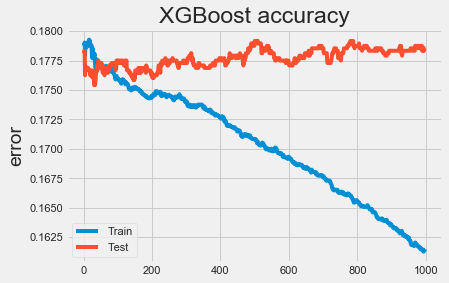

In [125]:
# retrieve performance metrics
results = best_XGB.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot rmse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('error')
plt.title('XGBoost accuracy')
plt.show()

In [352]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [357]:
from sklearn.model_selection import StratifiedKFold

folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)


grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3 )
grid.fit(X_train, y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  8.1min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed: 12.4min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed: 13.3min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x1c2de5f150>,
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='bi...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], '

In [358]:
grid.best_params_

{'colsample_bytree': 0.8,
 'gamma': 5,
 'max_depth': 5,
 'min_child_weight': 10,
 'subsample': 1.0}

In [359]:
grid_xgb = XGBClassifier(colsample_bytree = 0.8, gamma = 5, max_depth = 5, min_child_weight = 10, subsample = 1.0)
grid_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

In [360]:
grid_pred = grid_xgb.predict(X_test)

In [361]:
print(metrics.confusion_matrix(y_test, grid_pred))

[[3553  171]
 [ 678  398]]


In [363]:
cm = confusion_matrix(y_test,grid_pred)
classes = ['Will Not Default', 'Will Default']

Confusion Matrix, without normalization
[[3553  171]
 [ 678  398]]


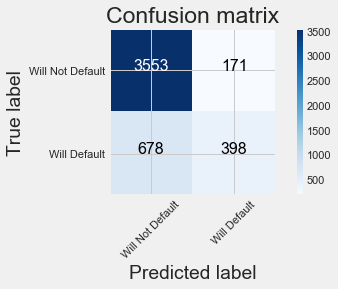

In [364]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [365]:
accuracy = metrics.accuracy_score(y_test, grid_pred)
precision = metrics.precision_score(y_test, grid_pred)
recall = metrics.recall_score(y_test, grid_pred)
f1 = metrics.f1_score(y_test, grid_pred)
y_pred_prob = grid_xgb.predict_proba(X_test)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, grid_pred)
cv = cross_val_score(grid_xgb, features, target, cv=10, scoring='roc_auc').mean()

pd.DataFrame(data=[accuracy, precision, recall, f1, roc_auc, cv],
             index=["accuracy", "precision", "recall", "F1", "ROC AUC", "CV"])

,0
accuracy,0.823
precision,0.699
recall,0.370
F1,0.484
ROC AUC,0.662
CV,0.779


## 6. Model Evaluation

For each model, we have generated the following metrics for comparison and for us to decide which of our models perform best in this particular dataset.
- Accuracy
- Precision
- Recall
- F1 Score
- ROC AUC Score
- Cross-validation Score

Based from assessment, we believe that our **last XGBoost model** perform the best due to its highest ROC AUC score. Although it was quite close between our various Random Forest models and XGBoost models.

## 7. Final Model

Below is our **final model**:


In [ ]:
grid_xgb = XGBClassifier(colsample_bytree = 0.8, gamma = 5, max_depth = 5, min_child_weight = 10, subsample = 1.0)
grid_xgb.fit(X_train, y_train)

The following cells are preparting the holdout features for prediction to compare versus the answer key.

In [276]:
holdout_df = pd.read_csv("hold_out_features.csv")

In [277]:
holdout_df.drop(['ID'], inplace=True, axis =1)
holdout_df['EDUCATION'].replace(5, 4, inplace=True)
holdout_df['EDUCATION'].replace(6, 4, inplace=True)
holdout_df['EDUCATION'].replace(0, 4, inplace=True)
holdout_df['MARRIAGE'].replace(0, 3, inplace=True)
holdout_df['PAY_0'].replace(-2, -1, inplace=True)
holdout_df['PAY_0'].replace(0, -1, inplace=True)
holdout_df['PAY_2'].replace(-2, -1, inplace=True)
holdout_df['PAY_2'].replace(0, -1, inplace=True)
holdout_df['PAY_3'].replace(-2, -1, inplace=True)
holdout_df['PAY_3'].replace(0, -1, inplace=True)
holdout_df['PAY_4'].replace(-2, -1, inplace=True)
holdout_df['PAY_4'].replace(0, -1, inplace=True)
holdout_df['PAY_5'].replace(-2, -1, inplace=True)
holdout_df['PAY_5'].replace(0, -1, inplace=True)
holdout_df['PAY_6'].replace(-2, -1, inplace=True)
holdout_df['PAY_6'].replace(0, -1, inplace=True)

In [278]:
holdout_df['BALANCE'] = (holdout_df['BILL_AMT1'] + holdout_df['BILL_AMT2'] + holdout_df['BILL_AMT3'] + holdout_df['BILL_AMT4'] + holdout_df['BILL_AMT5'] + holdout_df['BILL_AMT6']) - (holdout_df['PAY_AMT1'] + holdout_df['PAY_AMT2'] + holdout_df['PAY_AMT3'] + holdout_df['PAY_AMT4'] + holdout_df['PAY_AMT5'] + holdout_df['PAY_AMT6']) 

In [279]:
holdout_df.loc[((holdout_df.SEX == 1) & (holdout_df.MARRIAGE == 1)) , 'CIVIL_STATUS'] = 1 # Married man
holdout_df.loc[((holdout_df.SEX == 1) & (holdout_df.MARRIAGE == 2)) , 'CIVIL_STATUS'] = 2 # Single man
holdout_df.loc[((holdout_df.SEX == 1) & (holdout_df.MARRIAGE == 3)) , 'CIVIL_STATUS'] = 3 # Divorced/widowed man
holdout_df.loc[((holdout_df.SEX == 2) & (holdout_df.MARRIAGE == 1)) , 'CIVIL_STATUS'] = 4 # Married woman
holdout_df.loc[((holdout_df.SEX == 2) & (holdout_df.MARRIAGE == 2)) , 'CIVIL_STATUS'] = 5 # Single woman
holdout_df.loc[((holdout_df.SEX == 2) & (holdout_df.MARRIAGE == 3)) , 'CIVIL_STATUS'] = 6 # Divorced woman

In [280]:
del holdout_df['Unnamed: 0']

In [281]:
holdout_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BALANCE,CIVIL_STATUS
0,240000,1,1,1,44,-1,-1,-1,-1,-1,-1,4221,2188,2701,2427,1104,2362,2188,2701,2427,1104,2362,519,3702,1.000
1,50000,1,3,1,41,-1,-1,-1,-1,-1,-1,49782,50741,48468,39203,28913,26636,1816,1753,1433,990,967,1071,235713,1.000
2,20000,2,3,1,41,-1,-1,-1,-1,-1,-1,8777,10461,11583,13079,14546,16149,2000,1600,2000,2000,2000,2000,62995,4.000
3,320000,2,1,2,34,-1,-1,-1,-1,-1,-1,-532,-532,-528,-1336,-1336,-1336,0,4,0,0,0,0,-5604,5.000
4,120000,2,2,1,23,-1,-1,-1,-1,-1,-1,64049,65984,66825,68820,69776,71297,3000,2500,3100,2700,2800,2800,389851,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,200000,2,1,2,30,-1,-1,2,2,2,2,182967,194924,75635,94454,60875,41221,15349,10,32000,0,3000,0,599717,5.000
5997,100000,2,2,1,36,2,2,2,2,2,2,78063,79346,77977,79071,76918,81713,3500,3300,3000,0,6500,3000,453788,4.000
5998,50000,2,2,1,42,3,3,2,2,-1,-1,24225,24046,24574,24348,16130,16467,500,1200,516,566,585,608,125815,4.000
5999,70000,2,1,1,32,-1,-1,-1,-1,-1,-1,70178,71312,71314,71595,70040,68927,2900,2766,3648,2700,2487,2600,406265,4.000


In [282]:
holdout_features = holdout_df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BALANCE',
       'CIVIL_STATUS']]

In [366]:
grid_xgb_pred = grid_xgb.predict(holdout_features)

In [372]:
predictions = pd.DataFrame(grid_xgb_pred)
predictions.to_csv("emilia_bryan_predictions.csv")